### Load logs

In [2]:
import numpy as np
import glob
# Base LR consistent throughout 0.001
name_map =  {
    "cnn_base_v1_epochs=50_lr=0.001.": "Baseline CNN (50ep)",
    "cnn_dataAug_v1_epochs=50_lr=0.001.": "Data Aug Only (50ep)",
    "cnn_dataAug_dropoutfcl=0.4_v1_epochs=50_lr=0.001.": "Data Aug + FCL Dropout (50ep)",
    "cnn_dataAug_dropoutfcl=0.4_dropoutconv=0.1_v1_epochs=100_lr=0.001.": "Data Aug + FCL&CONV Dropout (100ep)",
    "cnn_dataAug_lrScheduling_dropoutfcl=0.4_dropoutconv=0.1_v1_epochs=50_lr=0.001.": "Data Aug + Dropout + LR Sched (50ep)",
    "cnn_dataAug_lrScheduling_dropoutfcl=0.4_dropoutconv=0.1_v1_epochs=100_lr=0.001.": "Data Aug + Dropout + LR Sched (<Factor) (100ep)",
    "cnn_dataAug_bestmodel_optimisedscheduler_bothdropout_lr=0.001_epochs=100.": "Best Model",
}
log_files = glob.glob("cnn-logs/*.npz")
experiments = {}
for file in log_files:
    filename = file.split("/")[-1].replace("npz", "")
    clean_name = name_map.get(filename, filename)
    experiments[clean_name] = np.load(file)

### Validaion Accuracy Comparison

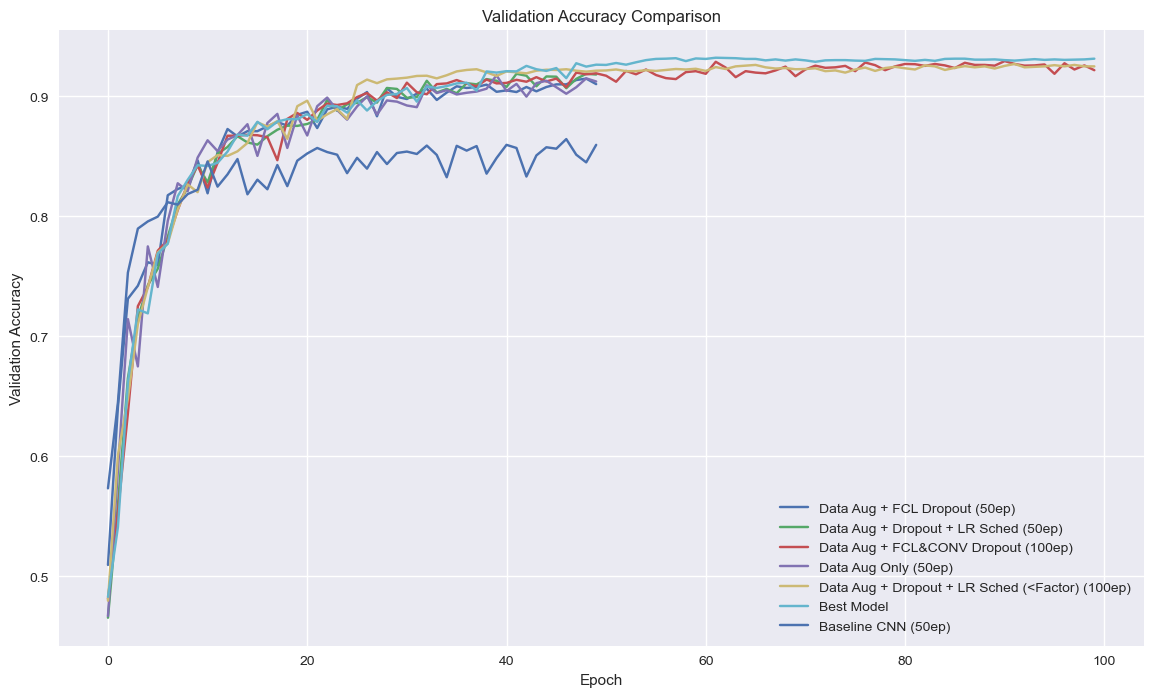

In [3]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(14, 8))
for name, logs in experiments.items():
    test_accuracy = logs['arr_3']
    plt.plot(test_accuracy, label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Validation Loss Comparison

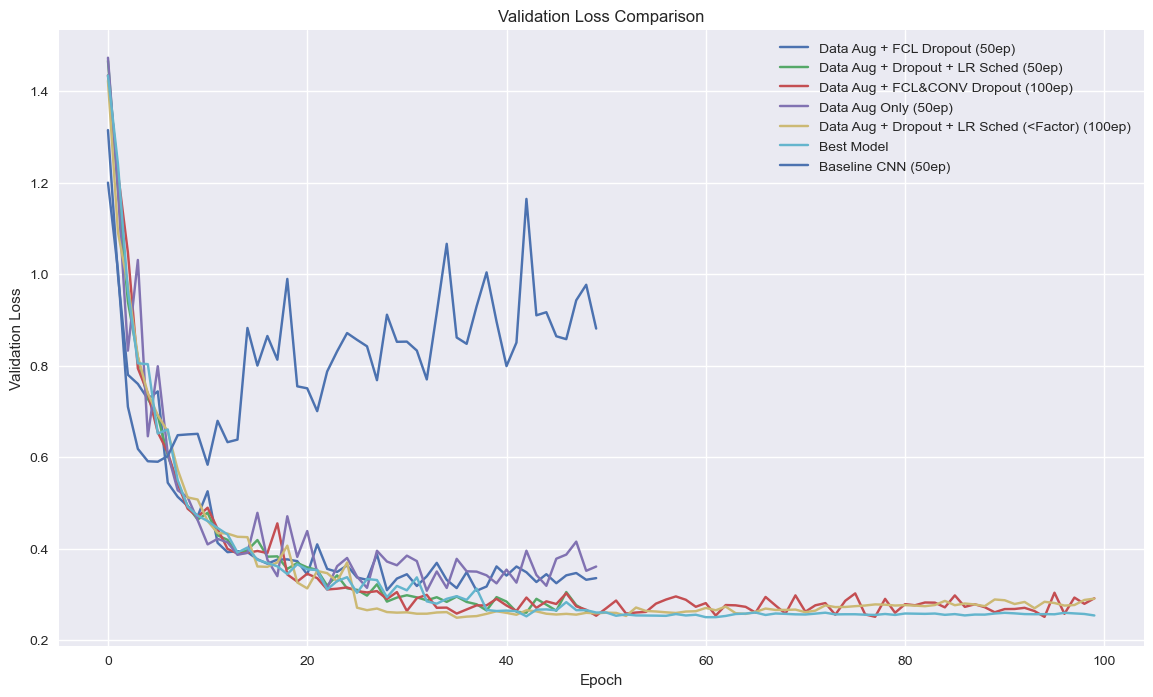

In [4]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(14, 8))
for name, logs in experiments.items():
    test_accuracy = logs['arr_2']
    plt.plot(test_accuracy, label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Test Accuracy Comparison